/opt/homebrew/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from font(s) Arial.
  func(*args, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


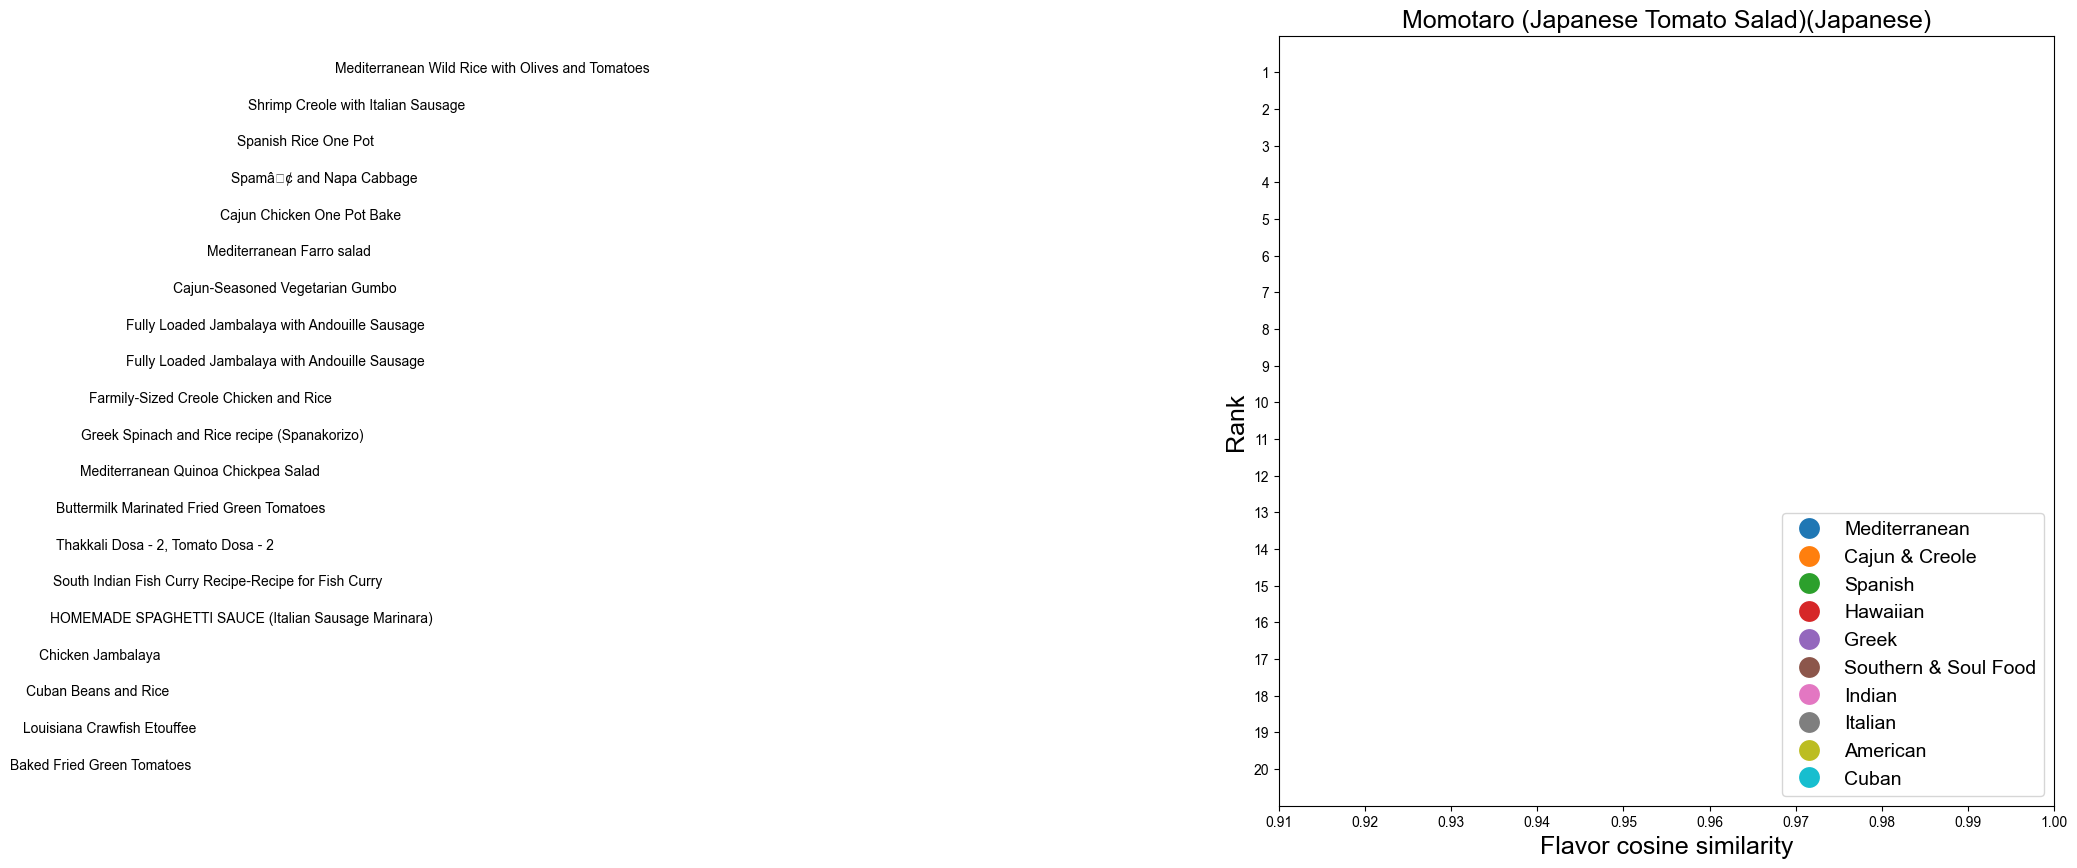

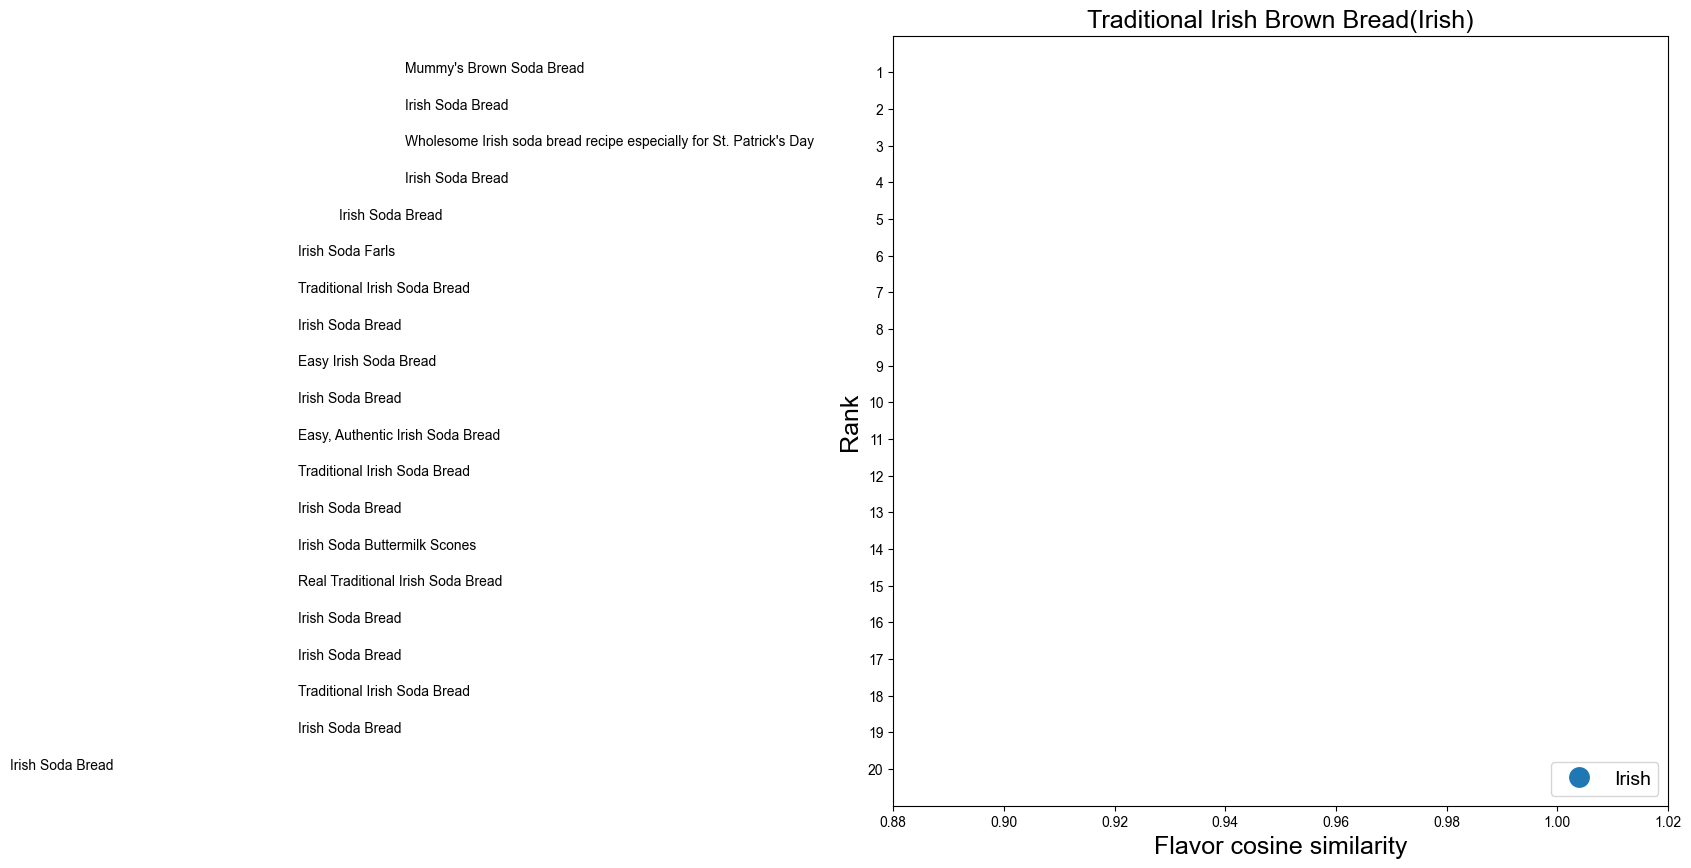

In [8]:
'''Make recommendations based on flavor profile

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

#this function prints out dishes similar to the query, either includding or exclusing dishes from its own cuisine, based on 'similar_cuisine'
def finddishes(idx,similar_cuisine=False):
    cuisine = yum_ingr2.iloc[idx]['cuisine']
    print('Dishes similar to', yum_ingr2.ix[idx, 'recipeName'], '('+yum_ingr2.ix[idx, 'cuisine']+')')
    match = yum_ingr2.iloc[yum_cos[idx].argsort()[-21:-1]][::-1]

    if not similar_cuisine:
        submatch = match[match['cuisine']!=cuisine]
    else:
        submatch = match
    print()
    for i in submatch.index:
        print(submatch.ix[i, 'recipeName'], '('+submatch.ix[i, 'cuisine']+')','(ID:'+str(i)+')')


#this function plot top-20 dishes similar to the query
def plot_similardishes(idx,xlim):
    match = yum_ingr2.iloc[yum_cos[idx].argsort()[-21:-1]][::-1]
    newidx = match.index.to_numpy()
    match['cosine'] = yum_cos[idx][newidx]
    match['rank'] = range(1,1+len(newidx))

    label1, label2 =[],[]
    for i in match.index:
        label1.append(match.loc[i, 'cuisine'])
        label2.append(match.loc[i, 'recipeName'])

    fig = plt.figure(figsize=(10,10))
    ax = sns.stripplot(y='rank', x='cosine', data=match, jitter=0.05,
                       hue='cuisine',size=15,orient="h")
    ax.set_title(yum_ingr2.loc[idx, 'recipeName'] + '(' + yum_ingr2.loc[idx, 'cuisine'] + ')', fontsize=18)
    ax.set_xlabel('Flavor cosine similarity',fontsize=18)
    ax.set_ylabel('Rank',fontsize=18)
    ax.yaxis.grid(color='white')
    ax.xaxis.grid(color='white')

    for label, y,x, in zip(label2, match['rank'],match['cosine']):
         ax.text(x+0.001,y-1,label, ha = 'left')
    ax.legend(loc = 'lower right',prop={'size':14})
    ax.set_ylim([20,-1])
    ax.set_xlim(xlim)


if __name__ == '__main__':
    yum_ingr = pd.read_pickle('data/yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('data/yummly_ingrX.pkl')
    yum_tfidf = pd.read_pickle('data/yum_tfidf.pkl')
    #calculate cosine similarity
    yum_cos = cosine_similarity(yum_tfidf)
    #reset index yum_ingr
    yum_ingr2 = yum_ingr.reset_index(drop=True)

    #plot similar dishes for Fettucini Bolognese
    idx = 3900
    xlim = [0.91,1.0]
    plot_similardishes(idx,xlim)
    #plot similar dishes for chicken tikka masala
    idx = 3315
    xlim = [0.88,1.02]
    plot_similardishes(idx,xlim)